### Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymysql
import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Rutas de Datos

In [3]:
ruta1='Datos/homicidios.xlsx'
ruta2='Datos/lesiones.xlsx'

### Analisis Exploratorio del dataset homicidios , apartado hechos

#### Transformacion y Limpieza de datos

In [4]:
homicidios_hechos=pd.read_excel(ruta1,sheet_name='HECHOS')
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [5]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se observa que la columna "Dirección Normalizada" es producto de la union de las columnas "LUGAR_DEL_HECHO" , "Calle" , "Altura" y "Cruce", por lo tanto para evitar la redundancia de datos solo se trabajará con la columna "Dirección Normalizada" elminando las columnas mencionadas anteriormente.

La columna "PARTICIPANTES" tampoco es reelevante dado que se desgloza en las coluna "VICTIMA" Y "ACUSADO" por lo tanto podemos precidir de ella.

La columna "HORA" la elimino tambien dado que desde el punto de vista del analisis es mas factible usar la columna HH

In [6]:
homicidios_hechos=homicidios_hechos.drop(['LUGAR_DEL_HECHO','HORA','Calle','Altura','Cruce','PARTICIPANTES'],axis=1)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO,CARGAS


##### Valores Nulos

In [7]:
homicidios_hechos.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HH                       0
TIPO_DE_CALLE            0
Dirección Normalizada    8
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
VICTIMA                  0
ACUSADO                  0
dtype: int64

Debido a la pequeña cantidad de datos nulos presentes en la columna "Dirección Normalizada" decidí eliminar aquellos registros que contengan nulos en algunos de sus campos.

In [8]:
homicidios_hechos=homicidios_hechos.dropna(subset='Dirección Normalizada').reset_index(drop=True)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO,AUTO
684,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO,AUTO
685,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO,CARGAS
686,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO,CARGAS


##### Duplicados

In [9]:
homicidios_hechos[homicidios_hechos.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO


Se obseva que no existen registros duplicados en el dataset

In [10]:
homicidios_hechos['HH'].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 21,
       20, 14, 3, 2, 13, 'SD'], dtype=object)

In [11]:
homicidios_hechos['HH'].value_counts()

HH
7     41
6     39
5     35
9     35
14    33
12    32
10    31
18    31
8     31
16    30
19    30
17    30
21    29
22    29
23    28
11    26
15    25
3     25
1     24
20    24
4     23
0     22
2     17
13    17
SD     1
Name: count, dtype: int64

Se observa que la columna 'HH' contiene un valor SD el cual indica que no hay datos, para el fin de desarrollar un buen analisis se procederá a eliminar este registro 

In [12]:
homicidios_hechos=homicidios_hechos[homicidios_hechos['HH']!='SD']
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO,AUTO
684,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO,AUTO
685,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO,CARGAS
686,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO,CARGAS


In [13]:
homicidios_hechos['HH']=homicidios_hechos['HH'].astype('int')
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 687
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     687 non-null    object        
 1   N_VICTIMAS             687 non-null    int64         
 2   FECHA                  687 non-null    datetime64[ns]
 3   AAAA                   687 non-null    int64         
 4   MM                     687 non-null    int64         
 5   DD                     687 non-null    int64         
 6   HH                     687 non-null    int32         
 7   TIPO_DE_CALLE          687 non-null    object        
 8   Dirección Normalizada  687 non-null    object        
 9   COMUNA                 687 non-null    int64         
 10  XY (CABA)              687 non-null    object        
 11  pos x                  687 non-null    object        
 12  pos y                  687 non-null    object        
 13  VICTIMA   

In [14]:
homicidios_hechos.describe() # solo aplica a variables cuantitativas 
# No hay observacionse reelevantes

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000
mean,1.029112,2018-09-16 06:36:09.432314368,2018.193595,6.695779,15.928675,11.660844,7.411936
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000
50%,1.000000,2018-07-15 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,17.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000
std,0.176695,NaN,1.682205,3.574574,8.635096,6.685127,4.380653


In [15]:
# Cambiar el tipo de dato de las columnas "pos x" y "pos y", crear funcion 
def cambiar_tipo_coordenadas(coordenadas):
    try:
        return float(coordenadas)

    except:
        return None
    


In [16]:
homicidios_hechos['pos x']=homicidios_hechos['pos x'].apply(cambiar_tipo_coordenadas)
homicidios_hechos['pos y']=homicidios_hechos['pos y'].apply(cambiar_tipo_coordenadas)

In [17]:
# Eliminar nulos generados producto de la transformacion anterior 
homicidios_hechos=homicidios_hechos.dropna().reset_index(drop=True)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO,AUTO
679,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO,AUTO
680,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO,CARGAS
681,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO,CARGAS


#### Analisis exploratorio

Encontrar relaciones entre variables, ver distribucion de datos y demas 

In [18]:
homicidios_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,683.000000,683,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.029283,2018-09-17 08:32:19.677891584,2018.197657,6.682284,15.938507,11.654466,7.415813,-58.441428,-34.619668
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.476178,-34.643745
50%,1.000000,2018-07-16 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622973
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596991
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654
std,0.177199,NaN,1.682372,3.572881,8.627296,6.669013,4.374665,0.046075,0.035302


<Axes: xlabel='HH', ylabel='Count'>

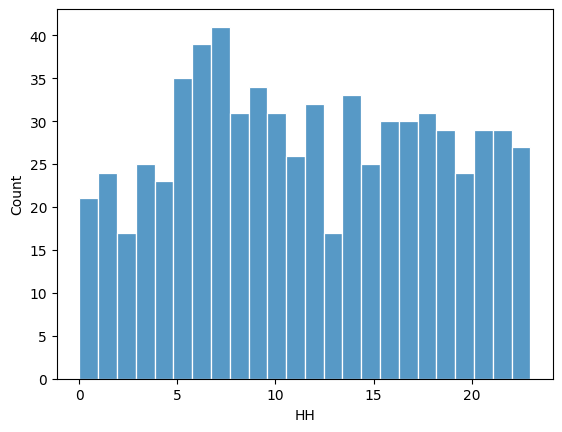

In [19]:
# Ver la distribucion de horas, para observar que horarios son los que tienen mas accidentes 
intervalos=homicidios_hechos['HH'].nunique()
horas=sns.histplot(x=homicidios_hechos['HH'],bins=intervalos,element='bars',stat='count',edgecolor='white',linewidth=0.9)
horas

# Observaciones, para saber con exactitud que hora fue la de mayor cantidad de accidentes necesitaria qeu en cada intervalo figure el valor de la hora o intevalo de horas, para hacer esto
# en seaborn es necesario hacerlo mediante un bucle for, lo cual no me parece muy eficiente 

In [20]:
# Cantida de vehiculos unicos
homicidios_hechos['VICTIMA'].nunique()

10

#### *Variables Cualitativas*

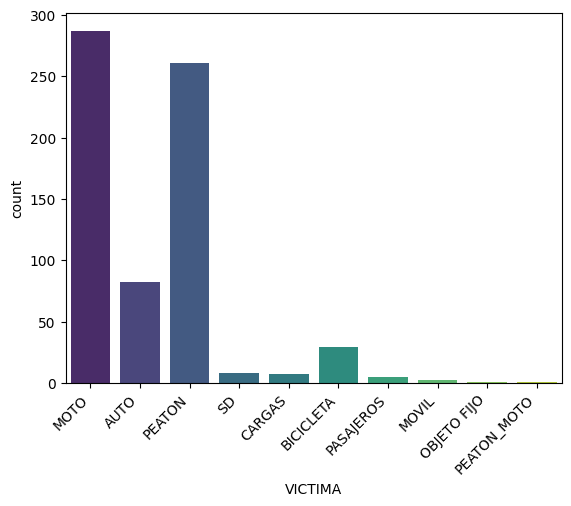

In [21]:
# Ver la distribucion de la variable categorica "VICTIMA"
# Jugar mas con countplot

ax=sns.countplot(x=homicidios_hechos['VICTIMA'],palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()


In [22]:
# SE puede eliminar esta categoria dado que no es reelevantes para mi analisis 
homicidios_hechos[homicidios_hechos['VICTIMA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,0,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.377146,-34.636575,SD,SD
75,2016-0101,1,2016-08-07,2016,8,7,19,GRAL PAZ,"PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.529329,-34.650150,SD,SD
87,2016-0115,1,2016-09-02,2016,9,2,11,CALLE,ARIAS y TRONADOR,12,Point (97608.87024259 108884.67029908),-58.489350,-34.549177,SD,CARGAS
91,2016-0119,1,2016-09-04,2016,9,4,6,AVENIDA,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.496592,-34.563536,SD,SD
160,2017-0029,1,2017-03-07,2017,3,7,2,CALLE,MOZART y TANDIL,9,Point (98009.35575364 97985.81952007),-58.485013,-34.647425,SD,AUTO
194,2017-0074,1,2017-06-04,2017,6,4,12,CALLE,CASCO 133,9,Point (94281.31244858 99043.29027489),-58.525671,-34.637878,SD,SD
207,2017-0089,1,2017-07-13,2017,7,13,12,CALLE,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.515147,-34.647871,SD,AUTO
261,2017-0155,1,2017-12-12,2017,12,12,21,AVENIDA,RIVADAVIA AV. 6350,7,Point (100674.98109200 100299.64949548),-58.455939,-34.626569,SD,MOTO


In [23]:
# Se puede observar que la categoria PEATON_MOTO , OBJETIVO FIJO,  MOVIL pueden presindirse debido al poco impacto que tienen en la variable, y para llevar a cabo un analisis mas limpio

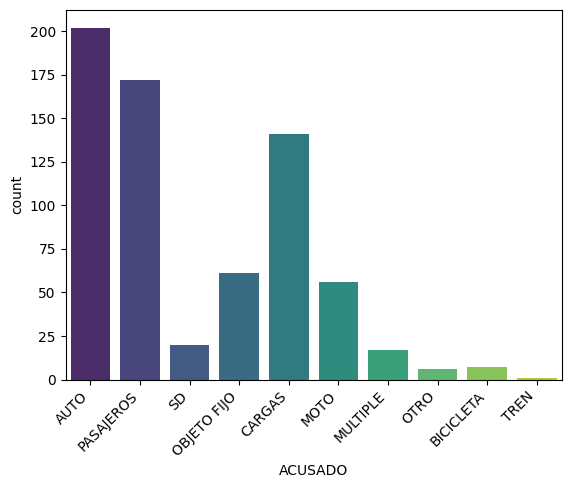

In [24]:
# Ver distribucion de variable "ACUSADO"

ax=sns.countplot(x=homicidios_hechos['ACUSADO'],palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [25]:
# Son 20 registros , lo cual supone casi el 3% de los datos , evaluar si se elimina o no, pero a mi creiterio si, dado que no aporta informacion util para mi analisis 
homicidios_hechos[homicidios_hechos['ACUSADO']=='SD'].shape

(20, 15)

In [26]:
homicidios_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO,AUTO


In [27]:
# Pasar letra del data frame a formato capitalize()
homicidios_hechos['TIPO_DE_CALLE']=homicidios_hechos['TIPO_DE_CALLE'].str.capitalize()
homicidios_hechos['Dirección Normalizada']=homicidios_hechos['Dirección Normalizada'].str.capitalize()
homicidios_hechos['VICTIMA']=homicidios_hechos['VICTIMA'].str.capitalize()
homicidios_hechos['ACUSADO']=homicidios_hechos['ACUSADO'].str.capitalize()
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,Avenida,"Piedra buena av. y fernandez de la cruz, f., g...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,Moto,Auto
1,2016-0002,1,2016-01-02,2016,1,2,1,Gral paz,"Paz, gral. av. y de los corrales av.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,Auto,Pasajeros
2,2016-0003,1,2016-01-03,2016,1,3,7,Avenida,Entre rios av. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,Moto,Auto
3,2016-0004,1,2016-01-10,2016,1,10,0,Avenida,"Larrazabal av. y villegas, conrado, gral.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,Moto,Sd
4,2016-0005,1,2016-01-21,2016,1,21,5,Avenida,"San juan av. y saenz peã‘a, luis, pres.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,Moto,Pasajeros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-0093,1,2021-12-13,2021,12,13,17,Avenida,Riestra av. y mom,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,Moto,Auto
679,2021-0094,1,2021-12-20,2021,12,20,1,Autopista,"Dellepiane, luis, tte. gral. y lacarra av.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,Moto,Auto
680,2021-0095,1,2021-12-30,2021,12,30,0,Avenida,Gaona av. y terrada,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,Moto,Cargas
681,2021-0096,1,2021-12-15,2021,12,15,10,Avenida,"Peron, eva av. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,Auto,Cargas


#### *FALTANTES*

In [28]:
# Renombrar columnas 
columnas_renombradas={'ID':'Id_homicidio', 'N_VICTIMAS':'N_Victimas', 'FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'HH':'Hora', 'TIPO_DE_CALLE':'Tipo_de_calle',
'Dirección Normalizada':'Direccion', 'COMUNA':'Comuna', 'XY (CABA)':'CABA_posicion', 'pos x':'Longitud', 'pos y':'Latitud','VICTIMA':'Victima', 'ACUSADO':'Acusado'}
homicidios_hechos.rename(columns=columnas_renombradas,inplace=True)

In [29]:
# Cambiar tipo 
homicidios_hechos['Comuna']=homicidios_hechos['Comuna'].astype('category')

### Analisis Exploratorio del dataset homicidios , apartado victimas

##### Transformacion y Limpieza de datos 

In [31]:
homicidios_victimas=pd.read_excel(ruta1,sheet_name='VICTIMAS')
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [32]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [33]:
# Explorar columna "EDAD"
homicidios_victimas['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

Para poder hacer analisis relacionados con la EDAD de las victimas, elimino aquellos registros que no contengan datos en la EDAD de las victimas 

In [34]:
homicidios_victimas=homicidios_victimas[homicidios_victimas['EDAD']!='SD'].reset_index(drop=True)
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
659,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
660,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
661,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
662,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [35]:
# Cambiar tipo de dato de la columna "EDAD"
homicidios_victimas['EDAD']=homicidios_victimas['EDAD'].astype(int)

In [36]:
# Explorar columna "FECHA_FALLECIMIENTO"
homicidios_victimas[homicidios_victimas['FECHA_FALLECIMIENTO']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
16,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
19,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
22,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,SD
41,2016-0064,2016-05-14,2016,5,14,PEATON,PEATON,MASCULINO,20,SD
43,2016-0067,2016-05-21,2016,5,21,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,30,SD
44,2016-0068,2016-05-22,2016,5,22,CONDUCTOR,MOTO,MASCULINO,58,SD
46,2016-0073,2016-06-11,2016,6,11,CONDUCTOR,MOTO,MASCULINO,23,SD
47,2016-0074,2016-06-12,2016,6,12,CONDUCTOR,AUTO,MASCULINO,60,SD
50,2016-0078,2016-06-13,2016,6,13,CONDUCTOR,MOTO,MASCULINO,30,SD


Dado que la cantidad significativa  de registros que no poseen datos acerca de la fecha de fallecimiento de las victimas, decido no eliminar estos registros, con el objetivo de evitar la perdidad de datos reelevantes.

In [37]:
# Dado que la fecha de fallecimiento no es reelevante para mi analisis la elimino.
homicidios_victimas.drop('FECHA_FALLECIMIENTO',axis=1,inplace=True)

In [38]:
# Valores nulos 
homicidios_victimas.isnull().sum()

ID_hecho    0
FECHA       0
AAAA        0
MM          0
DD          0
ROL         0
VICTIMA     0
SEXO        0
EDAD        0
dtype: int64

In [39]:
# Registros duplicados 
homicidios_victimas[homicidios_victimas.duplicated()] # sin registros duplicados

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD


In [102]:
homicidios_victimas.head()

,Id_homicidio,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30
3,2016-0004,2016-01-10,2016,1,10,Conductor,Moto,Masculino,18
4,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29


##### Analisis Exploratorio

In [115]:
filtro=homicidios_victimas['Victima'].isin(['Moto','Peaton'])
motos_peatones=homicidios_victimas[filtro]

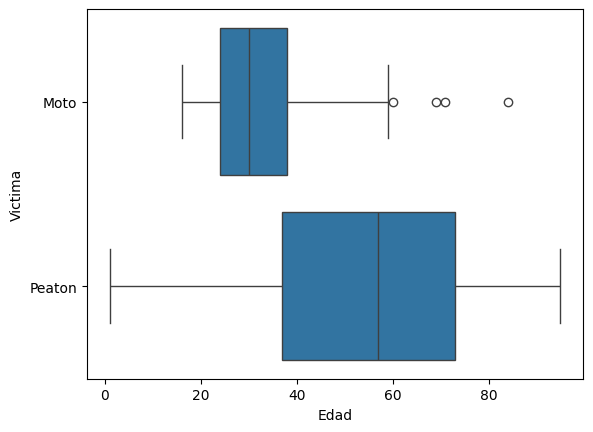

In [117]:
# Dado que la mayor cantidad de victimas son motos y peatones, se analizaran las edades de motociclista y peatones victimas de homicidios
fig=plt.figure()
ax=sns.boxplot(data=motos_peatones,x='Edad',y='Victima')
plt.show()

In [ ]:
# Se observa que los motociclistas victimas de homicidios son de menor edad respecto a peatones

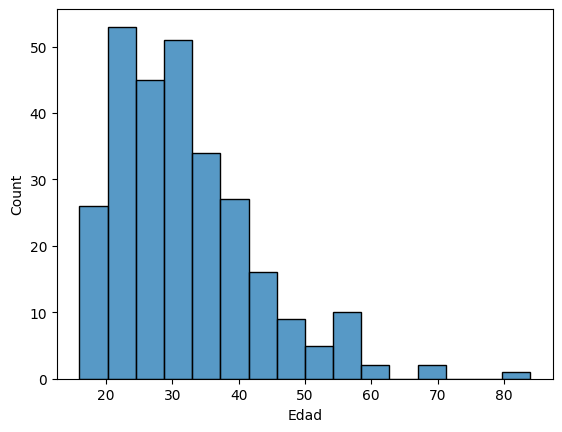

In [121]:
# Ver distribucion de edades de Motociclistas
fig=plt.figure()
ax=sns.histplot(x=motos_peatones[motos_peatones['Victima']=='Moto']['Edad'])
plt.show()

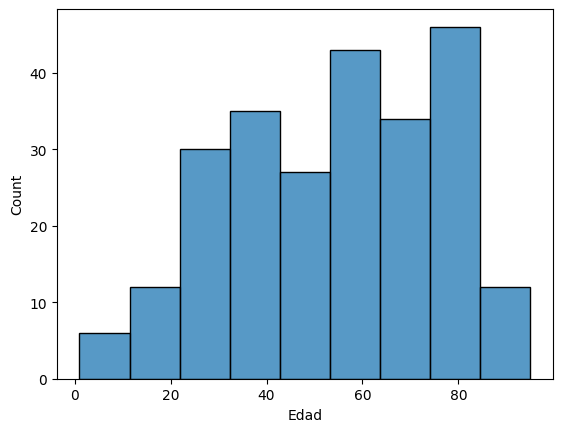

In [122]:
# Ver distribucion de edades de Peatones
fig=plt.figure()
ax=sns.histplot(x=motos_peatones[motos_peatones['Victima']=='Peaton']['Edad'])
plt.show()

#### *Variables Cualitativas*

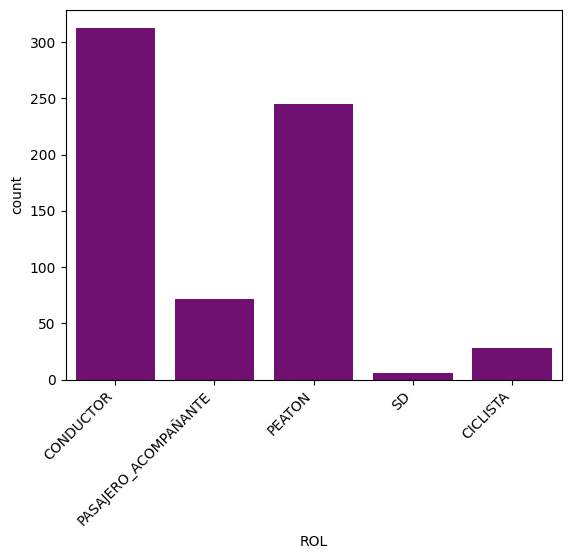

In [42]:
# Ver variable ROL
ax=sns.countplot(x=homicidios_victimas['ROL'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()



In [43]:
homicidios_victimas[homicidios_victimas['ROL']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
69,2016-0101,2016-08-07,2016,8,7,SD,SD,MASCULINO,67
150,2017-0029,2017-03-07,2017,3,7,SD,SD,MASCULINO,34
189,2017-0074,2017-06-04,2017,6,4,SD,SD,MASCULINO,70
202,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23
257,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77
361,2018-0100,2018-09-20,2018,9,20,SD,MOTO,FEMENINO,33


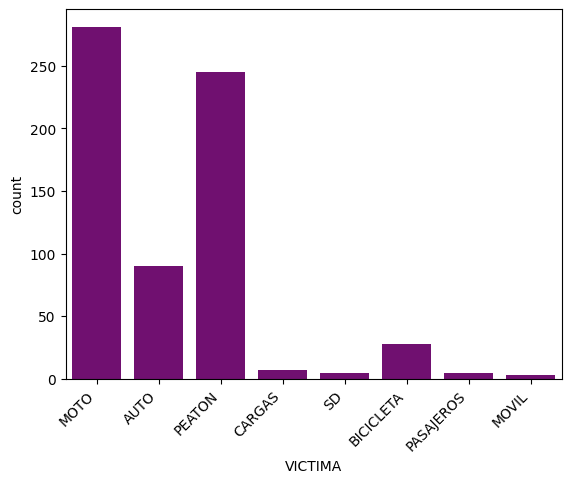

In [44]:
ax=sns.countplot(x=homicidios_victimas['VICTIMA'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()


In [45]:
homicidios_victimas[homicidios_victimas['VICTIMA']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
69,2016-0101,2016-08-07,2016,8,7,SD,SD,MASCULINO,67
150,2017-0029,2017-03-07,2017,3,7,SD,SD,MASCULINO,34
189,2017-0074,2017-06-04,2017,6,4,SD,SD,MASCULINO,70
202,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23
257,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77


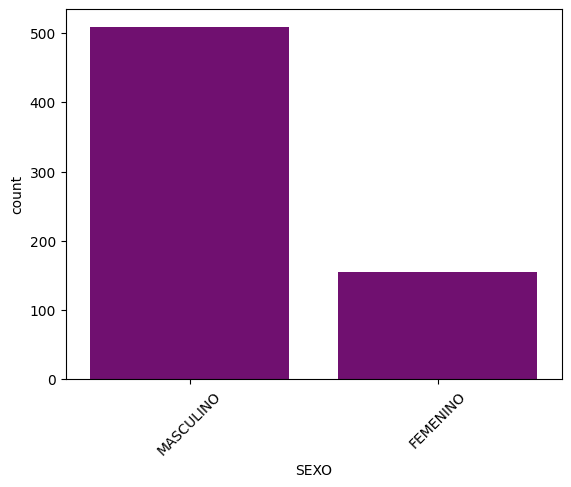

In [46]:
ax=sns.countplot(x=homicidios_victimas['SEXO'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

#### Conclusion del analisis y modificaciones

In [47]:
# Cambiar tipo de letra 
homicidios_victimas['ROL']=homicidios_victimas['ROL'].str.capitalize()
homicidios_victimas['VICTIMA']=homicidios_victimas['VICTIMA'].str.capitalize()
homicidios_victimas['SEXO']=homicidios_victimas['SEXO'].str.capitalize()

In [48]:
# Renombrar columnas 
columnas_renombradas={'ID_hecho':'Id_homicidio', 'FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'ROL':'Rol', 'VICTIMA':'Victima', 'SEXO':'Sexo','EDAD':'Edad'}
homicidios_victimas.rename(columns=columnas_renombradas,inplace=True)

### Analisis Exploratorio del dataset lesiones , apartado hechos

In [49]:
lesiones_hechos=pd.read_excel(ruta2,sheet_name='HECHOS')
lesiones_hechos

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


#### Transformación y Limpieza de datos

In [50]:
lesiones_hechos.iloc[:,7:]

,franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,9,SD,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",NaN,NaN,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,1,SD,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",NaN,NaN,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,2,SD,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",NaN,NaN,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,2,SD,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",NaN,NaN,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,4,SD,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",NaN,NaN,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",0.0,GUAMINI,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",4436.0,NaN,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,20,SD,1,SD,Barrio Padre Carlos Mugica (Villa 31 bis),NaN,NaN,NaN,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,22,LINIERS VIRREY y MORENO,5,CALLE,SD,LINIERS VIRREY,0.0,MORENO,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [51]:
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [52]:
# Observaciones 
    # columna "franja_hora" tipo incorrecto 
    # columna "comuna" tipo incorrecto 
    # columna "longitud" y "latitud" tipo incorrecto

##### Valores duplicados

In [53]:
lesiones_hechos[lesiones_hechos.duplicated()] # Sin registros duplicados

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


##### Valores Nulos

In [54]:
# Registros Nulos 
lesiones_hechos[lesiones_hechos.isna().all(axis=1)] # no existen registros nulos 

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [55]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [56]:
# Valores nulos - columna ID completa 
# Columnas tipo fecha
# Columna tipo numericas
# Registros duplicados 
# Revizar outliers en columnas : n_victimas 
# Histograma de frecuencias de variables cualitativas 


# Que es SD ? significa sin datos ? 

In [57]:
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [58]:
lesiones_hechos.iloc[:,8:]

,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,SD,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",NaN,NaN,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,SD,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",NaN,NaN,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,SD,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",NaN,NaN,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,SD,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",NaN,NaN,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,SD,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",NaN,NaN,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",0.0,GUAMINI,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",4436.0,NaN,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,SD,1,SD,Barrio Padre Carlos Mugica (Villa 31 bis),NaN,NaN,NaN,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LINIERS VIRREY y MORENO,5,CALLE,SD,LINIERS VIRREY,0.0,MORENO,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [59]:
lesiones_hechos[lesiones_hechos['direccion_normalizada']!='SD'].iloc[:,7:]

,franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
252,9,"PAZ, GRAL. AV. y ACHA, MARIANO, GRAL.",NaN,SD,SD,"PAZ, GRAL. AV.",NaN,"ACHA, MARIANO, GRAL.",Point (96982.6358422506 108957.813038542),NaN,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
253,16,DEL LIBERTADOR AV. 100,NaN,SD,SD,DEL LIBERTADOR AV.,100.0,NaN,Point (108067.125594 104023.680363),NaN,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
274,6,TRONADOR y GIRIBONE,NaN,SD,SD,TRONADOR,NaN,GIRIBONE,Point (99744.1439377455 105520.728400727),NaN,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
289,2,PASEO COLON AV. y MEXICO,NaN,SD,SD,PASEO COLON AV.,NaN,MEXICO,Point (108629.964506752 101606.761130562),NaN,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,GRAVE
393,2,"LACROZE, FEDERICO y CAMPOS, LUIS M. AV.",NaN,SD,SD,"LACROZE, FEDERICO",NaN,"CAMPOS, LUIS M. AV.",Point (102108.128777288 107087.128651998),NaN,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,14,"BELAUSTEGUI, LUIS, DR. y GONZALEZ, JOAQUIN V.",11,CALLE,SD,"BELAUSTEGUI, LUIS, DR.",0.0,"GONZALEZ, JOAQUIN V.",Point (97901.4137290459 100819.918260251),-58.486183621588,-34.621876700218,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23779,18,VIEL 276,6,CALLE,SD,VIEL,276.0,NaN,Point (102789.205730536 101060.9802249),-58.432885960226,-34.619702288565,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23780,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",0.0,GUAMINI,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",4436.0,NaN,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [60]:
lesiones_hechos[lesiones_hechos['direccion_normalizada']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,LC-2021-0641851,1,2021,12,25,2021-12-25 00:00:00,00:00:00,0,SD,SD,...,SD,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,GRAVE
23740,LC-2021-0649774,1,2021,12,29,2021-12-29 00:00:00,00:00:00,0,SD,SD,...,SD,PEATON,MOTO,PEATON-MOTO,x,0,0,0,0,GRAVE
23772,LC-2021-0652278,1,2021,12,31,2021-12-31 00:00:00,08:25:00,8,SD,SD,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [61]:
# las columnas "direccion_normalizada","calle", "cruce" y "altura" puedo eiminarlas ya que se incluyen en "direccion_normalizada", ademas no son reelevantes para el objetivo del analisis, que es reducir el nro de 
# victimas fatales por accidentes 

lesiones_hechos=lesiones_hechos.drop(columns=['hora','direccion_normalizada','otra_direccion','calle','altura','cruce','participantes']).reset_index(drop=True)
lesiones_hechos


,id,n_victimas,aaaa,mm,dd,fecha,franja_hora,comuna,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,9,14,SD,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,1,8,SD,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,2,8,SD,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,2,7,SD,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,4,3,SD,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19,9,AVENIDA,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19,9,AVENIDA,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20,1,SD,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22,5,CALLE,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [62]:
lesiones_hechos.iloc[:,8:]

,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,moto,auto,transporte_publico,camion,ciclista,gravedad
0,SD,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD,SD,SD,SD,x,SD
1,SD,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD,x,SD,SD,SD,SD
2,SD,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD,SD,SD,SD,SD,SD
3,SD,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,x,SD,SD,SD,SD,SD
4,SD,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...
23780,AVENIDA,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD,SD,SD,SD,SD,SD
23781,AVENIDA,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD,SD,SD,SD,SD,SD
23782,SD,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD,SD,SD,SD,SD,SD
23783,CALLE,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


#### *Variables Cualitativas*

In [63]:
lesiones_hechos.iloc[0:4,5:]
# Puedo eliminar columna hora 
# Revisar columna fecha
# revisar franja hora 
# revisar comuna

,fecha,franja_hora,comuna,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,moto,auto,transporte_publico,camion,ciclista,gravedad
0,2019-01-01 00:00:00,9,14,SD,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD,SD,SD,SD,x,SD
1,2019-01-01 00:00:00,1,8,SD,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD,x,SD,SD,SD,SD
2,2019-01-01 00:00:00,2,8,SD,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD,SD,SD,SD,SD,SD
3,2019-01-01 00:00:00,2,7,SD,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,x,SD,SD,SD,SD,SD


In [64]:
# Revisar columna fecha y cambiar a tipo fecha 
lesiones_hechos['fecha']=pd.to_datetime(lesiones_hechos['fecha'],errors='raise')

In [65]:
# Revisar "franja hora", ver por que motivo no esta en tipo int
# OBS: # tiene valores "sd" (solo 3 valores) elimino estos registros ya que son pocos - 
# Eliminar registros que contengan la etiqueta "sd"
lesiones_hechos=lesiones_hechos[lesiones_hechos['franja_hora']!='sd']
#Eliminar nulos 
lesiones_hechos.dropna(subset='franja_hora',inplace=True)
# Cambio el tipo de dato
lesiones_hechos['franja_hora']=lesiones_hechos['franja_hora'].astype(int,errors='raise')  

In [66]:
# Para la columna "comuna" decido eliminar nulos ya que la cantidad no es significativa respecto de la totalidad de los datos 
lesiones_hechos.dropna(subset='comuna',inplace=True)
#Pasar a tipo categorica dado que los numeros no representan una cantidad sino una categoria
lesiones_hechos['comuna']=lesiones_hechos['comuna'].astype('category')

In [67]:
# Columna "tipo_calle"
lesiones_hechos['tipo_calle'].isnull().sum()

0

In [68]:
lesiones_hechos['tipo_calle'].unique()

array(['SD', 'AVENIDA', 'CALLE', 'GRAL PAZ', 'AUTOPISTA'], dtype=object)

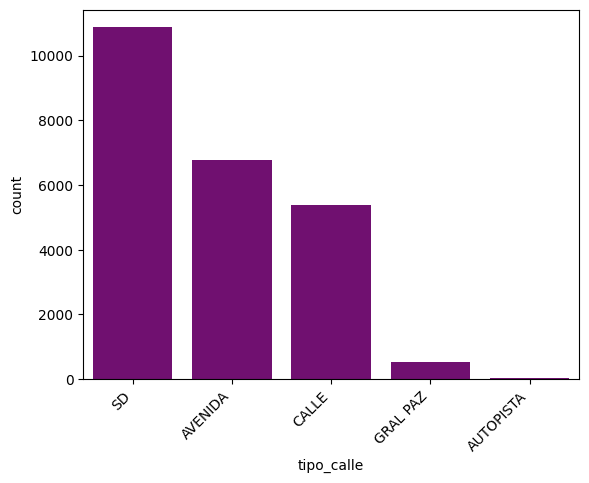

In [69]:
ax=sns.countplot(x=lesiones_hechos['tipo_calle'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

Debido a la cantidad significativa de la categoria "SD" (SIN DATOS), se dejará la columna tal cual está para evitar eliminar registros utiles para el análisis.

In [70]:
# COLUMNA "Longitud"
#OBS: Pasar a tipo float - 
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23610 entries, 0 to 23784
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    23610 non-null  object        
 1   n_victimas            23610 non-null  int64         
 2   aaaa                  23610 non-null  int64         
 3   mm                    23610 non-null  int64         
 4   dd                    23610 non-null  int64         
 5   fecha                 23610 non-null  datetime64[ns]
 6   franja_hora           23610 non-null  int32         
 7   comuna                23610 non-null  category      
 8   tipo_calle            23610 non-null  object        
 9   geocodificacion_CABA  23582 non-null  object        
 10  longitud              23517 non-null  object        
 11  latutid               23517 non-null  object        
 12  victima               23610 non-null  object        
 13  acusado              

In [71]:
lesiones_hechos['longitud'].isnull().sum()

93

In [72]:
# Cambiar tipo de columnas  "longitud", pasar a formato float, excluyendo los datos de otro tipo transformandolos en nulos
lesiones_hechos[lesiones_hechos['longitud']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,franja_hora,comuna,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,moto,auto,transporte_publico,camion,ciclista,gravedad
19,LC-2019-0000928,1,2019,1,2,2019-01-02,7,5,SD,SD,SD,SD,MOTO,SD,x,SD,SD,SD,x,SD
33,LC-2019-0022496,1,2019,1,2,2019-01-02,10,4,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD
72,LC-2019-0007634,1,2019,1,4,2019-01-04,14,No Especificada,SD,SD,SD,SD,MOTO,SD,x,SD,SD,SD,SD,SD
79,LC-2019-0008283,2,2019,1,4,2019-01-04,17,No Especificada,SD,SD,SD,SD,AUTO,SD,SD,x,SD,SD,SD,SD
93,LC-2019-0008974,1,2019,1,5,2019-01-05,9,No Especificada,SD,SD,SD,SD,CICLISTA,SD,SD,SD,SD,SD,x,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23607,LC-2021-0638528,1,2021,12,22,2021-12-22,0,SD,SD,SD,SD,SD,AUTO,AUTO,0,x,0,0,0,SD
23642,LC-2021-0640811,1,2021,12,23,2021-12-23,18,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD
23669,LC-2021-0641851,1,2021,12,25,2021-12-25,0,SD,SD,SD,SD,SD,AUTO,SD,SD,x,SD,SD,SD,GRAVE
23740,LC-2021-0649774,1,2021,12,29,2021-12-29,0,SD,SD,SD,SD,SD,PEATON,MOTO,x,0,0,0,0,GRAVE


Del analisis anterior se observa que la variable "longitud" posee valores tales como "SD" se procede a eliminar dichos valores con el fin de solo trabajar con datos de tipo numericos.Además se eliminaran aquellos valores que sean nulos

In [73]:
# Eliminar registros con valor "SD"
lesiones_hechos=lesiones_hechos[lesiones_hechos['longitud']!='SD'].reset_index(drop=True)

In [74]:
# Cambiar tipos 
lesiones_hechos['longitud']=lesiones_hechos['longitud'].astype(float)

In [75]:
# Eliminar nulos 
lesiones_hechos.dropna(subset='longitud',inplace=True)

In [76]:
# COLUMNA "latitud"
lesiones_hechos['latutid'].isnull().sum()

0

In [77]:
# Cambiar a tipo float
lesiones_hechos['latutid']=lesiones_hechos['latutid'].astype(float)

In [78]:
# COLUMNA "victima"
lesiones_hechos['victima'].isnull().sum()


0

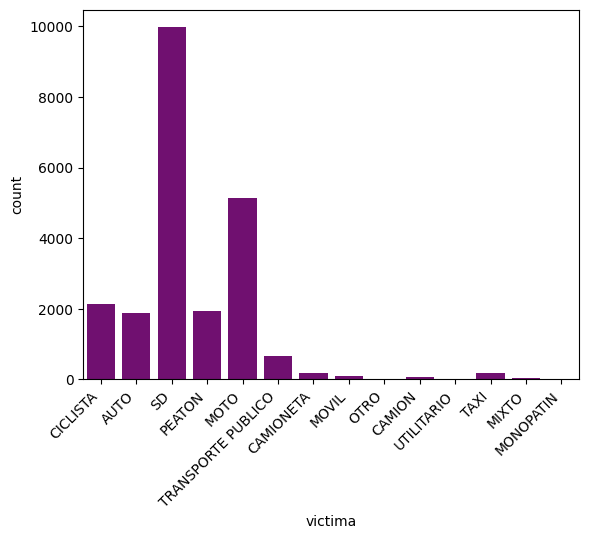

In [79]:
ax=sns.countplot(x=lesiones_hechos['victima'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()


Se observa que la columna "victima" posee una gran cantidad de valores sin datos "SD" por tal motivo se dejará la misma tal cual está pára evitar la perdida de registros necesarios.

In [80]:
# COLUMNA "acusado"
lesiones_hechos['acusado'].isnull().sum()

0

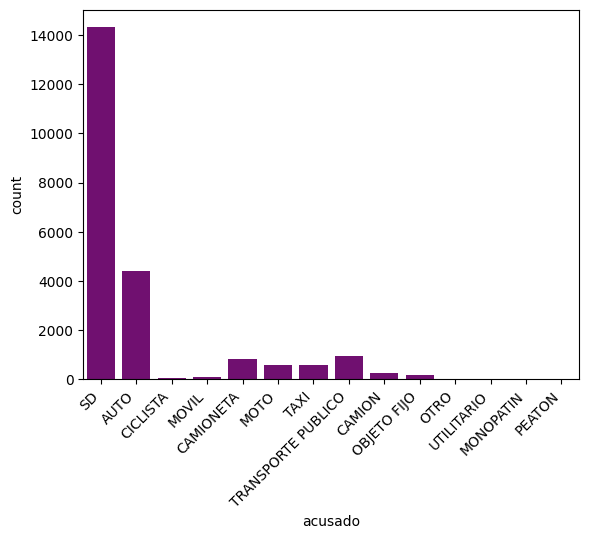

In [81]:
ax=sns.countplot(x=lesiones_hechos['acusado'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

Se observa que la columna "acusado" posee una gran cantidad de valores sin datos "SD" por tal motivo se dejará la misma tal cual está pára evitar la perdida de registros necesarios.

In [82]:
# Revisar columna Gravedad 
lesiones_hechos['gravedad'].isnull().sum()

0

In [83]:
lesiones_hechos['gravedad'].unique()

array(['SD', 'sd', 'GRAVE', 'grave', 'FATAL'], dtype=object)

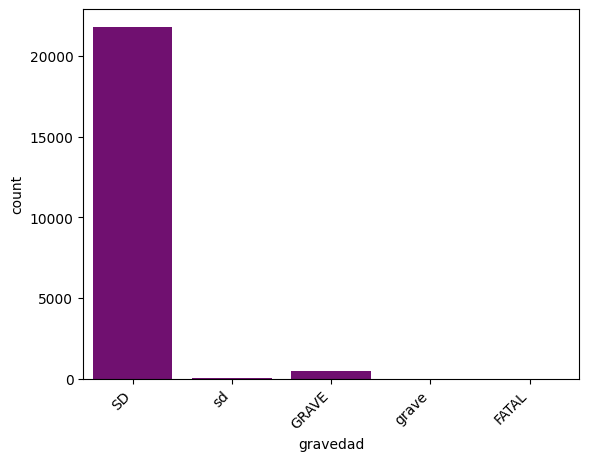

In [84]:
ax=sns.countplot(x=lesiones_hechos['gravedad'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [85]:
# Unificar tipo de letra
lesiones_hechos['gravedad']=lesiones_hechos['gravedad'].str.capitalize()
lesiones_hechos['gravedad'].unique()

array(['Sd', 'Grave', 'Fatal'], dtype=object)

De lo observado decido no eliminar la categoria "SD" ya que su eliminación supoondría la eliminación de una gran cantidad de registros y datos importantes.

In [86]:
# Renombrar columnas 
columnas={'id':'Id_lesion', 'n_victimas':'N_victimas', 'aaaa':'Año', 'mm':'Mes', 'dd':'Dia'}
lesiones_hechos.rename(columns=columnas,inplace=True)
lesiones_hechos.columns=lesiones_hechos.columns.str.capitalize()
lesiones_hechos

,Id_lesion,N_victimas,Año,Mes,Dia,Fecha,Franja_hora,Comuna,Tipo_calle,Geocodificacion_caba,Longitud,Latutid,Victima,Acusado,Moto,Auto,Transporte_publico,Camion,Ciclista,Gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01,9,14,SD,Point (104991.46333918849995825 107720.9664748...,-5.840891e+01,-3.455966e+01,CICLISTA,SD,SD,SD,SD,SD,x,Sd
1,LC-2019-0000053,1,2019,1,1,2019-01-01,1,8,SD,Point (101813.84712503915943671 95578.55507230...,-5.844351e+01,-3.466913e+01,AUTO,SD,SD,x,SD,SD,SD,Sd
2,LC-2019-0000063,1,2019,1,1,2019-01-01,2,8,SD,Point (99538.58660300650808495 94643.418717990...,-5.846834e+01,-3.467756e+01,SD,SD,SD,SD,SD,SD,SD,Sd
3,LC-2019-0000079,1,2019,1,1,2019-01-01,2,7,SD,Point (102372.16830963784013875 97994.13750300...,-5.843742e+01,-3.464735e+01,PEATON,SD,x,SD,SD,SD,SD,Sd
4,LC-2019-0000082,4,2019,1,1,2019-01-01,4,3,SD,Point (105968.98286849579017144 102737.1734686...,-5.839822e+01,-3.460458e+01,AUTO,SD,SD,SD,x,SD,SD,Sd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,LC-2021-0652849,1,2021,12,31,2021-12-31,19,9,AVENIDA,Point (95400.5441905024 96621.6007711877),-5.851348e+01,-3.465971e+01,SD,SD,SD,SD,SD,SD,SD,Sd
22403,LC-2021-0652865,2,2021,12,31,2021-12-31,19,9,AVENIDA,Point (97705.4491469278 98614.8825470092),-5.848833e+01,-3.464175e+01,SD,SD,SD,SD,SD,SD,SD,Sd
22404,LC-2021-0652907,1,2021,12,31,2021-12-31,20,1,SD,Point (107377.10694920316745993 105120.7873965...,-5.838289e+01,-3.458308e+01,SD,SD,SD,SD,SD,SD,SD,Sd
22405,LC-2021-0652921,1,2021,12,31,2021-12-31,22,5,CALLE,Point (104472.702045632 101660.930364258),-5.841453e+01,-3.461429e+01,MOTO,TRANSPORTE PUBLICO,x,0,x,0,0,Grave


#### Analisis Exploratorio

### Analisis Exploratorio del dataset lesiones , apartado victimas

In [87]:
lesiones_victimas=pd.read_excel(ruta2,sheet_name='VICTIMAS')
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


##### Transformación y Limpieza de Datos

In [88]:
lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [89]:
lesiones_victimas.isnull().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

In [90]:
# EXPLORACION COLUMNA "VEHICULO_VICTIMA"
lesiones_victimas['VEHICULO_VICTIMA'].unique()

array(['sd', 'MOTO', 'AUTO', 'TAXI', 'PEATON', 'CICLISTA', 'SD',
       'TRANSPORTE PUBLICO', 'MOVIL', 'CAMION', 'UTILITARIO', 'MONOPATIN',
       'MIXTO', 'OTRO'], dtype=object)

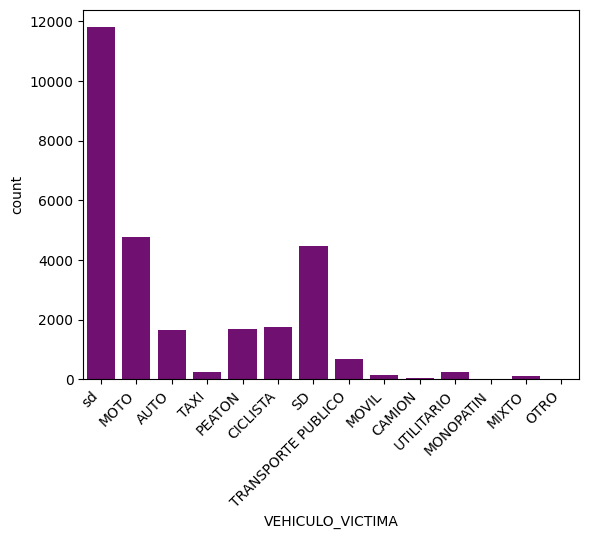

In [91]:
ax=sns.countplot(x=lesiones_victimas['VEHICULO_VICTIMA'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [92]:
#Unificar tipo de letra 
lesiones_victimas['VEHICULO_VICTIMA']=lesiones_victimas['VEHICULO_VICTIMA'].str.capitalize()
lesiones_victimas['VEHICULO_VICTIMA'].unique()

array(['Sd', 'Moto', 'Auto', 'Taxi', 'Peaton', 'Ciclista',
       'Transporte publico', 'Movil', 'Camion', 'Utilitario', 'Monopatin',
       'Mixto', 'Otro'], dtype=object)

Debido a la precencia de gran cantida de valores sin datos "sd" y "SD", se mantendrá la columna en el estado actual para evitar eliminar registros y datos de importancia para el analisis.

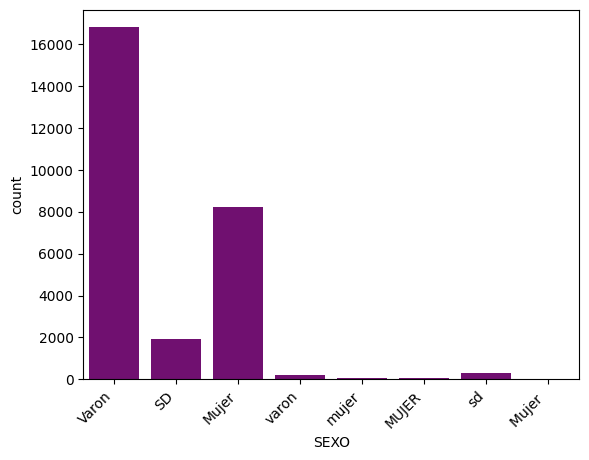

In [93]:
# EXPLORACION COLUMNA "SEXO"
ax=sns.countplot(x=lesiones_victimas['SEXO'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [94]:
# Unificar tipo de letra 
lesiones_victimas['SEXO']=lesiones_victimas['SEXO'].str.capitalize()
lesiones_victimas['SEXO'].unique()

array(['Varon', 'Sd', 'Mujer', 'Mujer '], dtype=object)

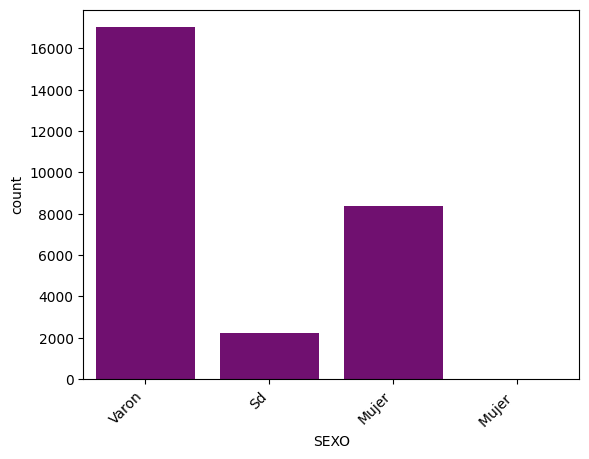

In [95]:
ax=sns.countplot(x=lesiones_victimas['SEXO'],color='purple')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

Se observa que es necesario unificar algunas etiquetas para mejor comprension de los datos

In [96]:
# Unificar tipo de letra 
lesiones_victimas['SEXO']=lesiones_victimas['SEXO'].str.capitalize()
lesiones_victimas['SEXO'].unique()

array(['Varon', 'Sd', 'Mujer', 'Mujer '], dtype=object)

In [97]:
# Eliminar espacios
lesiones_victimas['SEXO']=lesiones_victimas['SEXO'].str.strip()
lesiones_victimas['SEXO'].unique()

array(['Varon', 'Sd', 'Mujer'], dtype=object)

In [98]:
# EXPLORACION COLUMNA  "EDAD_VICTIMA"
lesiones_victimas['EDAD_VICTIMA'].unique()

array([57, 'SD', 45, 27, 32, 21, 37, 33, 25, 23, 42, 53, 1, 62, 67, 75,
       40, 48, 3, 49, '25', 34, 52, 44, 28, 59, 50, 73, '26', 51, 16, 43,
       38, 64, 36, 84, 22, 26, '32', 20, 5, 39, 56, 69, 55, 46, 29, 41,
       54, 74, 70, 6, 30, 12, 83, 24, 35, 68, 15, 31, 19, '30', 9, 2, 13,
       18, 17, 58, 60, 47, '20', 7, 63, 66, 80, 65, 71, 79, 85, 61, 77,
       90, '43', '58', '45', 76, '54', '55', 89, '74', '19', 78, 91, 97,
       10, 72, 88, 11, 81, '31', 8, 14, '50', '21', 96, '27', '34', '40',
       '28', '59', '39', 82, 87, 86, '38', '37', 'sd', '44', '29', '35',
       '42', '18', 4, '23', '41', 92, '46', '72', '36', '24', '87', '16',
       '14', '33', '61', '12', '49', '62', '90', '22', '60', '64', '56',
       '78', '65', '51', '53', '66', '71', '76', '47', '52', '48', '13',
       '63', '68', '15', '57', '70', '73', '80', '67', '5', '84', '94',
       '86', '3', '69', '6', '17', '91', '7', '8', '82', '75', '85', '77',
       '4', '81', '83', '2', '11', '88', '9', '79

In [99]:
lesiones_victimas['EDAD_VICTIMA'].astype(int,errors='raise')

ValueError: invalid literal for int() with base 10: 'SD'

In [ ]:
# Ver cuantos valores "SD" existen
lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']=='SD']

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
1,LC-2019-0000063,2019,1,1,2019-01-01,Sd,Sd,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,Sd,Varon,SD,SD
10,LC-2019-0000179,2019,1,1,2019-01-01,Sd,Sd,SD,SD
14,LC-2019-0000347,2019,1,1,2019-01-01,Sd,Varon,SD,SD
21,LC-2019-0000647,2019,1,1,2019-01-01,Sd,Varon,SD,SD
...,...,...,...,...,...,...,...,...,...
27578,LC-2021-0000449,2021,1,1,2021-01-01,Sd,Sd,SD,SD
27589,LC-2021-0078012,2021,2,21,2021-02-21,Sd,Sd,SD,SD
27595,LC-2021-0230174,2021,5,26,2021-05-26,Sd,Sd,SD,SD
27596,LC-2021-0305042,2021,6,28,2021-06-28,Auto,Sd,SD,SD


In [ ]:
# Comparar cantidad de registros sin datos con el tamaño del dataframe 
lesiones_victimas.shape

(27605, 9)

Para llevar a cabo un analisis mas limpio decido solo trabajar con aquellos registros donde el valor en la columna "EDAD_VICTIMA" sea del tipo numerico, por lo tanto se eliminan todos los datos de la columna cuyo valor sea "SD"

In [ ]:
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!='SD']
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!='sd']
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,Sd,Varon,57,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Mujer,45,SD
5,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Varon,27,SD
6,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Mujer,32,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,Transporte publico,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,Transporte publico,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,Transporte publico,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,Moto,Varon,32,SD


In [ ]:
# Cambiar a tipo entero la columna "EDAD_VICTIMA"
lesiones_victimas['EDAD_VICTIMA']=lesiones_victimas['EDAD_VICTIMA'].astype(int)

In [ ]:
#Estaditicas de variables cuantitativas
lesiones_victimas.describe()

,AAA,MM,DD,FECHA,EDAD_VICTIMA
count,23134.000000,23134.000000,23134.000000,23134,23134.000000
mean,2019.925780,6.741333,15.657085,2020-06-10 22:57:00.420160768,37.727241
min,2019.000000,1.000000,1.000000,2019-01-01 00:00:00,0.000000
25%,2019.000000,4.000000,8.000000,2019-07-31 00:00:00,27.000000
50%,2020.000000,7.000000,16.000000,2020-05-14 00:00:00,35.000000
75%,2021.000000,10.000000,23.000000,2021-04-16 00:00:00,46.000000
max,2021.000000,12.000000,31.000000,2021-12-31 00:00:00,100.000000
std,0.863221,3.483503,8.654921,NaN,15.216933


In [ ]:
lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']==0]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
17055,LC-2020-0682924,2020,12,30,2020-12-30,Sd,Mujer,0,sd
19134,LC-2021-0632881,2021,12,20,2021-12-20,Sd,Varon,0,SD


De lo observado decido eliminar aquellos registros cuya edad de las victimas sea igual a cero

In [ ]:
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!=0].reset_index(drop=True)
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,Sd,Varon,57,SD
1,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Varon,45,SD
2,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Mujer,45,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Varon,27,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,Sd,Mujer,32,SD
...,...,...,...,...,...,...,...,...,...
23127,LC-2021-0451911,2021,9,11,2021-09-11,Transporte publico,Varon,87,SD
23128,LC-2021-0530228,2021,10,25,2021-10-25,Transporte publico,Mujer,60,SD
23129,LC-2021-0530228,2021,10,25,2021-10-25,Transporte publico,Mujer,32,SD
23130,LC-2021-0201378,2021,5,2,2021-05-02,Moto,Varon,32,SD


In [ ]:
# EXPLORACION COLUMNA "GRAVEDAD"
lesiones_victimas['GRAVEDAD'].unique()

array(['SD', 'sd', 'GRAVE', 'grave'], dtype=object)

In [ ]:
# Unificar tipo de letra 
lesiones_victimas['GRAVEDAD']=lesiones_victimas['GRAVEDAD'].str.capitalize()
lesiones_victimas['GRAVEDAD'].unique()

array(['Sd', 'Grave'], dtype=object)

In [ ]:
# Unificar tipo de letra 
lesiones_victimas.columns=lesiones_victimas.columns.str.capitalize()
# Eliminar espacios
lesiones_victimas.columns=lesiones_victimas.columns.str.strip()
# Renombrar columnas
columnas={'Id hecho':'Id_lesion','Aaa':'Año', 'Mm':'Mes', 'Dd':'Dia'}
lesiones_victimas.rename(columns=columnas,inplace=True)

##### Análisis Exploratorio

In [ ]:
# Ver como se distribuyen las EDADES a travez de un diagrama de dispersion o histograma o un grafico de caja

### Exportar datos a Mysql

In [ ]:
# Exportar los datos de cada dataframe en las tablas correspondientes en MySql
try: 
    conection=pymysql.connect(host='localhost',
                                    user='root',
                                    password='12345',
                                    database='pi2_henry')  # cambiar nombre de la base de datos
    cursor=conection.cursor()
    
    print('La conexion con la base de datos se realizó con éxito')
    df=[(homicidios_hechos,'homicidios_hechos'),(homicidios_victimas,'homicidios_victimas'),(lesiones_hechos,'lesiones_hechos'),(lesiones_victimas,'lesiones_victimas')]
    if conection:
        for dataframe in df:
            for i,row in dataframe[0].iterrows(): # nombre del dataframe
                    tabla=dataframe[1] # introducir el nombre de la tabla en mysql donde quiero insertar los datos
                    sql=f"INSERT IGNORE INTO {tabla} VALUES (" + "%s,"*(len(row)-1) + "%s)"
                    valores=tuple(row)
                    cursor.execute(sql,valores)
                    
    conection.commit()
    print('La carga de datos se ralizó con exito')
            
                

except pymysql.Error as error:
    print('Error al insertar datos en la base de datos:',error)

finally: 
    if conection:
            conection.close()


La conexion con la base de datos se realizó con éxito


La carga de datos se ralizó con exito
